In [1]:
#IMPORTING THE PYTHON LIBRARY 

In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 


# Understanding the data 

In [4]:
df=sns.load_dataset("iris")
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [5]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [6]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [11]:
df.shape


(150, 5)

In [12]:
print(df.size)

750


In [13]:
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [15]:
df.species.value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

# VISUALIZATION

<AxesSubplot: xlabel='count', ylabel='species'>

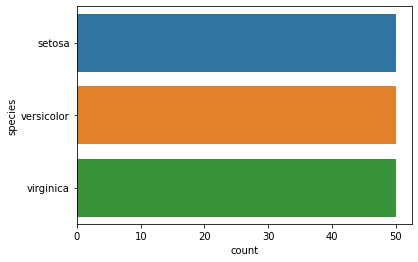

In [16]:
sns.countplot(y=df.species)

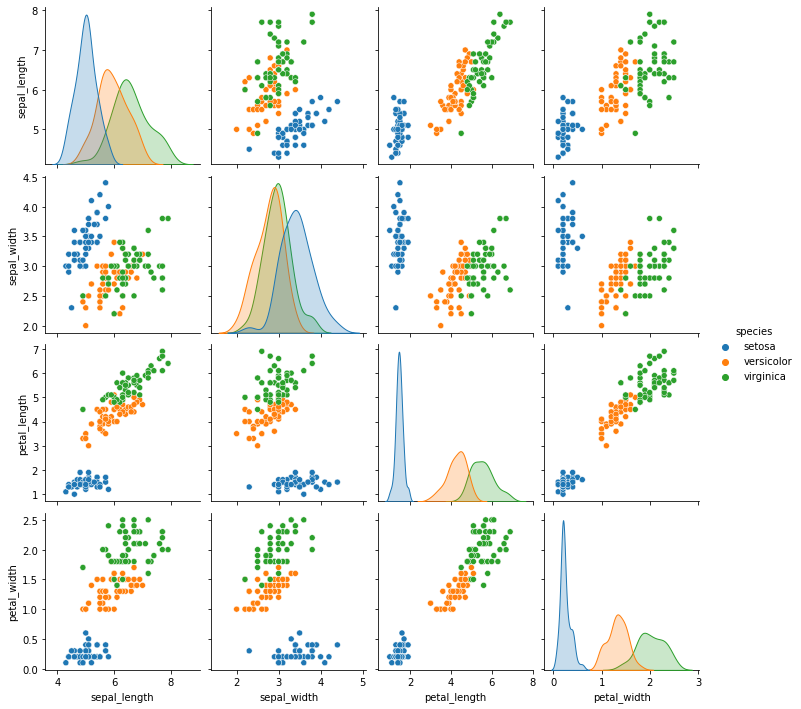

In [23]:
sns.pairplot(df, hue="species")

# correlation

In [24]:
df.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


<AxesSubplot: >

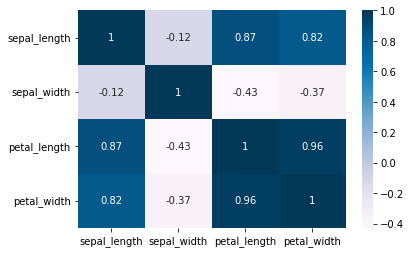

In [25]:
sns.heatmap(df.corr(),annot=True,cmap="PuBu")

In [26]:
#sklearn.library

In [27]:
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer


In [28]:
le=LabelEncoder()

In [29]:
df.iloc[:,-1]=le.fit_transform(df.iloc[:,-1])
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [30]:
x=df.iloc[:,:-1]
x.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [34]:
y=df.iloc[:,-1]
y.head()

0    0
1    0
2    0
3    0
4    0
Name: species, dtype: int32

In [39]:
#Spliting the train and test data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=50)
x_train.head()

,sepal_length,sepal_width,petal_length,petal_width
125,7.2,3.2,6.0,1.8
98,5.1,2.5,3.0,1.1
73,6.1,2.8,4.7,1.2
144,6.7,3.3,5.7,2.5
21,5.1,3.7,1.5,0.4


In [40]:
print(x_train.shape,x_test.shape)

(120, 4) (30, 4)


In [41]:
print(y_train.shape,y_test.shape)

(120,) (30,)


# Model building for decision tree

In [45]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()


In [49]:
dt.fit(x_train, y_train)

DecisionTreeClassifier()

# Comparison between actual and predicted output

In [50]:
y_pred=dt.predict(x_test)
y_pred

array([1, 1, 0, 0, 2, 2, 2, 0, 0, 1, 0, 2, 0, 2, 1, 0, 1, 0, 1, 2, 2, 1,
       0, 2, 1, 2, 1, 1, 1, 2])

In [51]:
y_test=np.array(y_test)
y_test

array([1, 1, 0, 0, 2, 2, 2, 0, 0, 1, 0, 2, 0, 2, 1, 0, 1, 0, 1, 1, 2, 1,
       0, 2, 1, 2, 1, 1, 1, 2])

In [52]:
final_pred=pd.DataFrame({"actual":y_test,"predicted":dt.predict(x_test)})

In [53]:
final_pred.sample(n=10)

,actual,predicted
7,0,0
18,1,1
27,1,1
24,1,1
11,2,2
5,2,2
28,1,1
26,1,1
19,1,2
22,0,0


In [54]:
from sklearn.metrics import accuracy_score
import sklearn.metrics as metrics

In [57]:
metrics.accuracy_score(final_pred.actual, final_pred.predicted)

0.9666666666666667

In [58]:
from sklearn.metrics import accuracy_score

In [59]:
accuracy_score(y_pred, y_test)

0.9666666666666667

In [60]:
#confusion matrics

In [61]:
from sklearn.metrics import confusion_matrix


In [62]:
confusion_matrix(y_pred,y_test)

array([[ 9,  0,  0],
       [ 0, 11,  0],
       [ 0,  1,  9]], dtype=int64)

# classification report of decision tree model/


In [63]:
from sklearn.metrics import classification_report

In [64]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       0.92      1.00      0.96        11
           2       1.00      0.90      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



# Desion tree Visualization

In [65]:
from sklearn import tree
from matplotlib import pyplot as plt

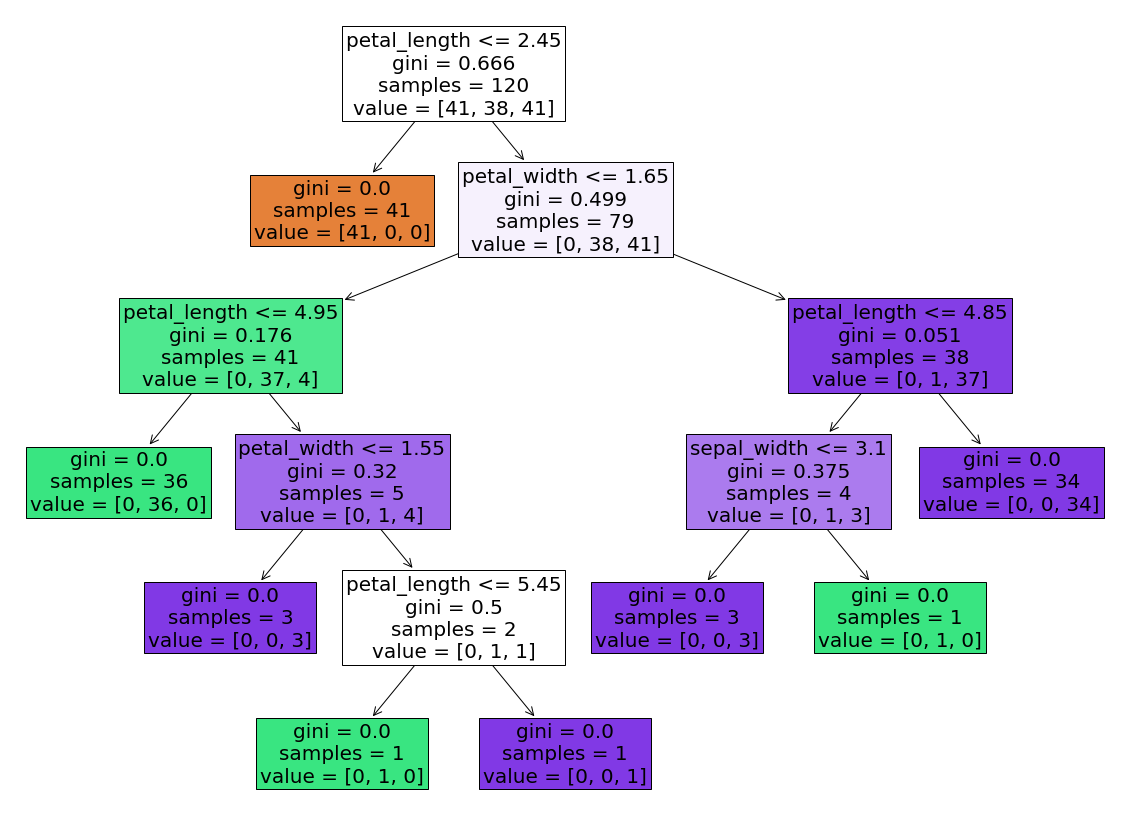

In [66]:
plt.figure(figsize=(20,15))
tviz=tree.plot_tree(dt, feature_names=x.columns, filled=True, fontsize=20)